# Visualizing Metal Bands by Nation

## About the dataset

The [Metal Bands by Nation](https://www.kaggle.com/mrpantherson/metal-by-nation/data) dataset was scraped from [Metalstorm](http://metalstorm.net/), the largest metal forum online. It contains information about 5,000 metal bands from all over the world, including their names, numbers of fans on Metalstorm, years and countries of origin, and so on. Here I'm peeking into this dataset through basic visualization to gain some initial insights.

## Importing data 

In [177]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import chardet
import math
# More spacing around subplots
%matplotlib inline 

I first tried to open the data file using `pd.read_csv()`. In Python, the default encoding type for strings is Unicode.

In [ ]:
bands = pd.read_csv('metal_bands_2017.csv')

However, I got a `UnicodeDecodeError`, suggesting that the data file was encoded in a different way. Let's use chardet to check its encoding type.

In [178]:
# Check the first 10,000 bytes to guess the encoding type:
with open("metal_bands_2017.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))
# Display the best guess:
print(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


The most likely encoding type is 'ISO-8859-1'. Specifying it as the encoding type led to successful data reading.

In [179]:
# Read the titanic.csv file as a data frame 
bands = pd.read_csv('metal_bands_2017.csv', encoding='ISO-8859-1')

## Data cleaning

Show first few rows to see what's in the data:

In [157]:
bands.head()

,Unnamed: 0,band_name,fans,formed,origin,split,style
0,0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy"
1,1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive"
2,2,Metallica,3712,1981,USA,-,"Heavy,Bay area thrash"
3,3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock"
4,4,Amon Amarth,3054,1988,Sweden,-,Melodic death


The first column doesn't seem useful. Let's get rid of it.

In [180]:
# Use .iloc[] to avoid spelling out all column names
bands = bands.iloc[:,1:7]
# Peek into the new data frame
bands.head()

,band_name,fans,formed,origin,split,style
0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy"
1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive"
2,Metallica,3712,1981,USA,-,"Heavy,Bay area thrash"
3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock"
4,Amon Amarth,3054,1988,Sweden,-,Melodic death


Due to mistakes, the same band sometimes has multiple pages on Metalstrom. Let's use `.duplicate()` to check whether duplicates exist.

In [181]:
bands['band_name'].duplicated().sum()

51

Indeed, there are 51 duplicates. `.drop_duplicates()` allows us to keep one entry for each band. The keyword `keep` specifies which entry (first or last) to keep. Here I kept the first entries.

In [182]:
bands.drop_duplicates(keep='first')

,band_name,fans,formed,origin,split,style
0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy"
1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive"
2,Metallica,3712,1981,USA,-,"Heavy,Bay area thrash"
3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock"
4,Amon Amarth,3054,1988,Sweden,-,Melodic death
5,Slayer,2955,1981,USA,1981,Thrash
6,Death,2690,1983,USA,2001,"Progressive death,Death,Progressive thrash"
7,Dream Theater,2329,1985,USA,1985,Progressive
8,Black Sabbath,2307,1968,United Kingdom,-,"Doom,Heavy,Hard rock"
9,Nightwish,2183,1996,Finland,1996,"Symphonic power,Gothic,Symphonic"


For an active band, its "split" column is a missing value. We can replace missing values with an empty string `''`.

In [183]:
bands.fillna('')

,band_name,fans,formed,origin,split,style
0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy"
1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive"
2,Metallica,3712,1981,USA,-,"Heavy,Bay area thrash"
3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock"
4,Amon Amarth,3054,1988,Sweden,-,Melodic death
5,Slayer,2955,1981,USA,1981,Thrash
6,Death,2690,1983,USA,2001,"Progressive death,Death,Progressive thrash"
7,Dream Theater,2329,1985,USA,1985,Progressive
8,Black Sabbath,2307,1968,United Kingdom,-,"Doom,Heavy,Hard rock"
9,Nightwish,2183,1996,Finland,1996,"Symphonic power,Gothic,Symphonic"


Finally, many bands play multiple genres, which are now stored in a single column. Having a separate column for each genre makes it easier to do visulization or analysis on genres later. 

In [184]:
# Split each cell in the "style" column into a string with 6 items
Genre = bands['style'].str.split(',', n = 5, expand = True)
# Create 6 new columns, each getting string items with a certain index number (0 to 5)
bands['main_genre'] = Genre[0]
bands['secondary_genre'] = Genre[1]
bands['genre_3'] = Genre[2]
bands['genre_4'] = Genre[3]
bands['genre_5'] = Genre[4]
bands['genre_6'] = Genre[5]
# Look at the new data frame
bands.head()

,band_name,fans,formed,origin,split,style,main_genre,secondary_genre,genre_3,genre_4,genre_5,genre_6
0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy",New wave of british heavy,Heavy,None,None,None,None
1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive",Extreme progressive,Progressive rock,Progressive,None,None,None
2,Metallica,3712,1981,USA,-,"Heavy,Bay area thrash",Heavy,Bay area thrash,None,None,None,None
3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock",Thrash,Heavy,Hard rock,None,None,None
4,Amon Amarth,3054,1988,Sweden,-,Melodic death,Melodic death,None,None,None,None,None


## Data visualization
Now, let's use data visualization to answer some burning questions for metal heads!

### Which country has the most metal bands?

The answer this question, we can draw a bar plot where the x-axis is the names of all countries and the y-axis is the number of metal bands from each country. Country names ("origin") are provided but not the number of bands from each country. We can use `.value_counts()` to count the number of rows under each country . 

Finall, using the `plot()` function, we can generate the barplot below.

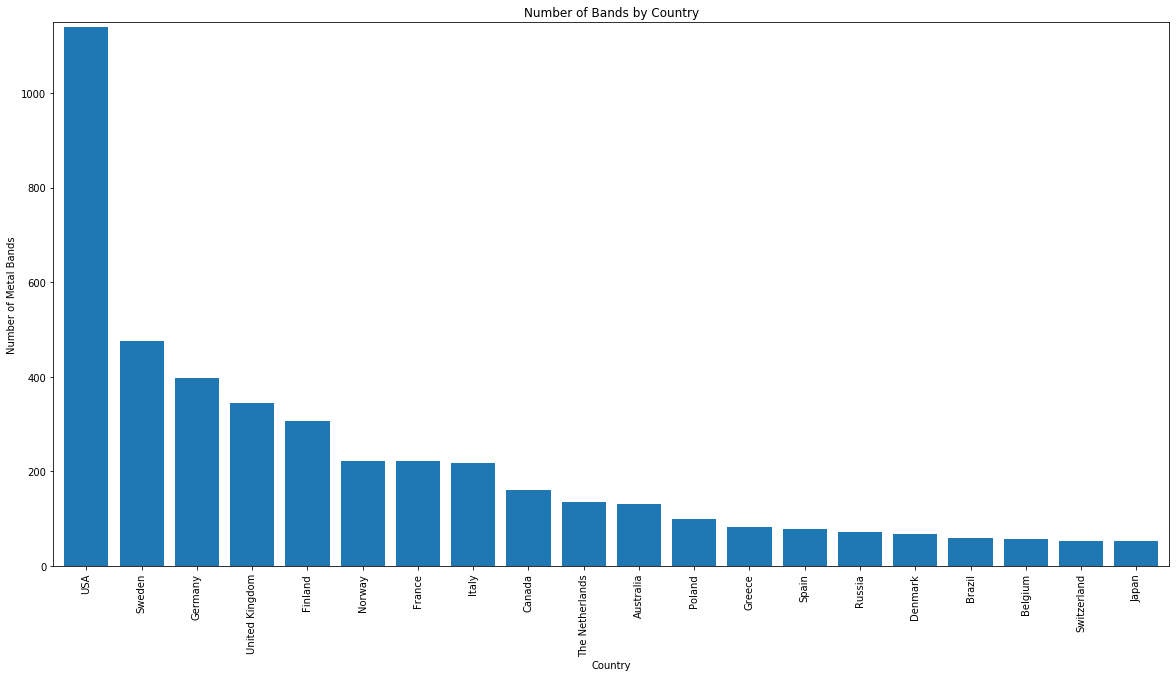

In [185]:
# Set the figure size
plt.figure(figsize=(20,10))

# Create a series with country names and the number of rows under each name
bands_country = bands['origin'].value_counts()

# For simplicity, we only select countries in the top 20 range
## The x-axis: country names
countries = bands_country[:20].keys() 
index = np.arange(len(countries))
## The y-axis: row counts
counts = bands_country[:20].values

# Generate the bar plot
plt.bar(index, counts)
plt.xticks(index, countries, rotation=90) # Rotate x-axis text 

# Adjust spacing 
## Some space on top
plt.ylim(0, max(counts) + 10)
## Some on the left 
plt.margins(0.01, 0)

# Add title and labels
plt.ylabel('Number of Metal Bands')
plt.xlabel('Country')
plt.title('Number of Bands by Country')

# Display the plot
plt.show()

The USA has by far the most metal bands in the world, which was followed by European countries such as Sweden, Germany, the UK, Finland, and Norway. 

### Is the metal scene dwindling in recent years?
Metal used to be more or less a "mainstream" music genre during the heyday of Metallica, Megadeth, and other metal legends, which no longer seems to be the case. Intuitions aside, is the metal scene actually dwindling over the years? To answer this question, we can plot the number of bands formed in each year.

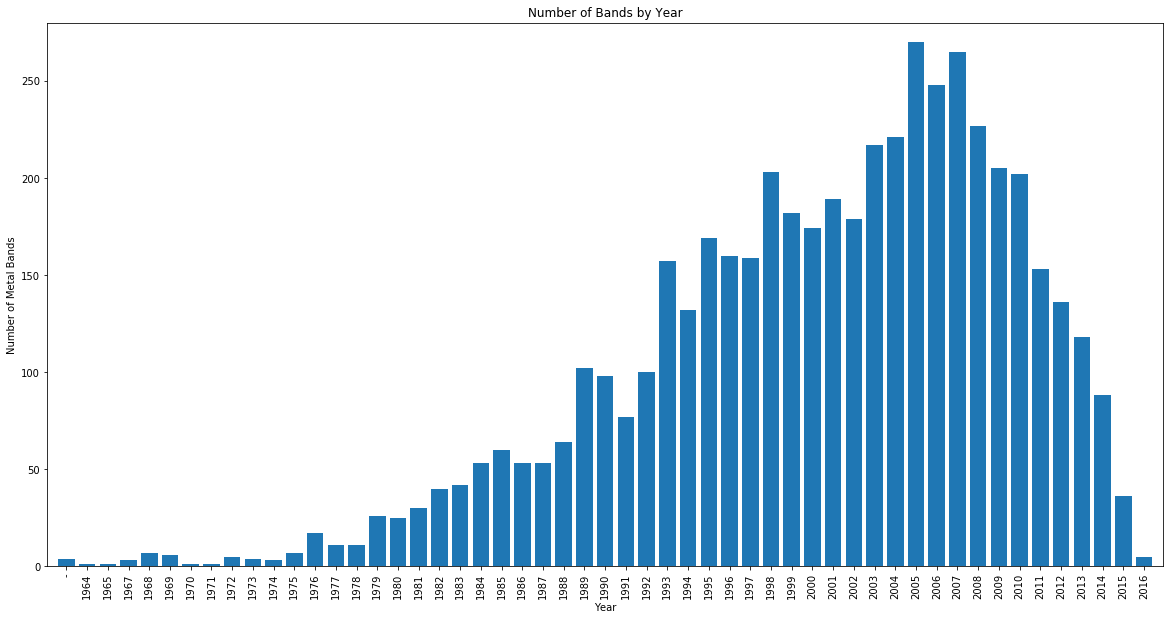

In [186]:
# Set the figure size
plt.figure(figsize=(20,10))

# Create a series with years and the number of rows in each year
# Since year has a natural order, we need to add .sort_index() after .value_counts()
bands_year = bands['formed'].value_counts().sort_index()

# Extract data for both axes
## The x-axis: years 
years = bands_year.keys()
index = np.arange(len(years))
## The y-axis: row counts
counts = bands_year.values

# Generate the bar plot
plt.bar(index, counts)
plt.xticks(index, years, rotation=90) # Rotate x-axis text 

# Adjust spacing 
## Some space on top
plt.ylim(0, max(counts) + 10)
## Some on the left 
plt.margins(0.01, 0)

# Add title and labels
plt.ylabel('Number of Metal Bands')
plt.xlabel('Year')
plt.title('Number of Bands by Year')

# Display the plot
plt.show()

The late 70's to 2008 has seen a steady growth of metal bands. From 2009 to 2016, however, there were fewer new bands formed each year. The metal scene does seem to shrink in recent years.

### Popularity and years since formation
Do bands with a longer history tend to have more fans? Perhpas. While some of the biggest names certainly aged well, many lost popularity after their prime. To shed light on this relationship, we can draw a scatter plot where the x-axis is the years since each band's formation (up to 2016 when the dataset was created) and the y-axis is the number of fans on Metalstorm.

To begin, let's create a new column "history" to store how long it had been since each band's formation.

In [211]:
# To compute a band's years since formation, we need to first convert the year it was formed into a numeric
# Failed at first attmept: Some bands have missing values, which cannot converted to numerics
# The fix: Choose "coerce" for the "errors" keyword so that missing values will be set as NaN
bands['history'] = 2016 - pd.to_numeric(bands['formed'], errors='coerce')

# The default outputs are floats, which can be converted to integers
# Note: to ensure successful conversion, again we need to handle missing values
bands['history'] = bands['history'].fillna(0.0).astype(int)

# Show the new data frame
bands.head()

,band_name,fans,formed,origin,split,style,main_genre,secondary_genre,genre_3,genre_4,genre_5,genre_6,history
0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy",New wave of british heavy,Heavy,None,None,None,None,41
1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive",Extreme progressive,Progressive rock,Progressive,None,None,None,26
2,Metallica,3712,1981,USA,-,"Heavy,Bay area thrash",Heavy,Bay area thrash,None,None,None,None,35
3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock",Thrash,Heavy,Hard rock,None,None,None,33
4,Amon Amarth,3054,1988,Sweden,-,Melodic death,Melodic death,None,None,None,None,None,28


Looks great! Now we can finally create the scatter plot!

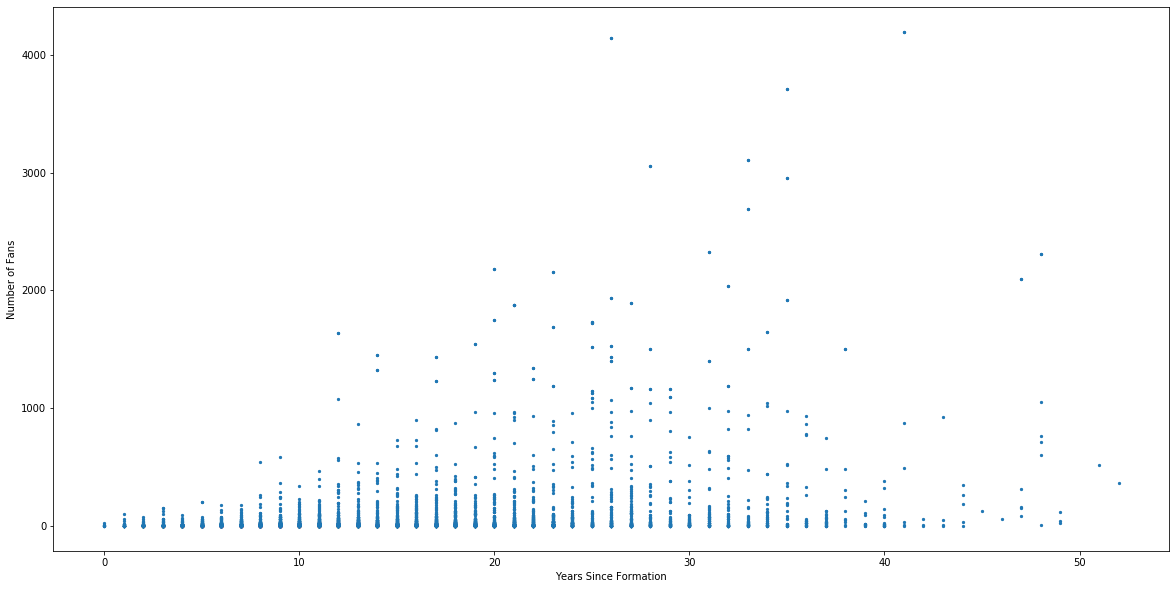

In [229]:
# Set the figure size
plt.figure(figsize=(20,10))

# Generate the scatter plot
plt.scatter(x=bands['history'], y=bands['fans'], s=5)

# Add title and labels
plt.ylabel('Number of Fans')
plt.xlabel('Years Since Formation')

# Display the plot
plt.show()

In the scatter plot above, many data points overlap , making it hard to see everthing. This is a common issue called "overplotting". To avoid it, we can "jitter" the data points; that is, adding small random noise to the x values so the data points won't overlap as much.

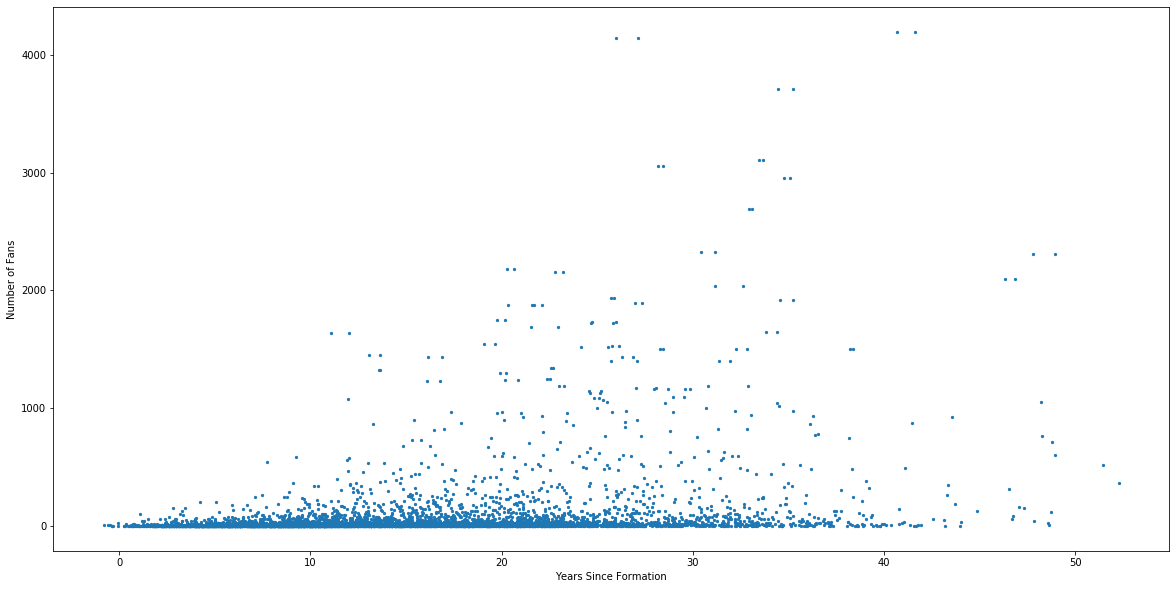

In [227]:
# Take an array as input, outputs a new array with random noise added
def rand_jitter(arr):
    stdev = .01*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

# This is bands' years since formation after jittering
jittered_history = rand_jitter(bands['history'])

# Set the figure size
plt.figure(figsize=(20,10))

# Generate the scatter plot using jittered points
plt.scatter(x=jittered_history, y=bands['fans'], s=5)

# Add title and labels
plt.ylabel('Number of Fans')
plt.xlabel('Years Since Formation')

# Display the plot
plt.show()

Overall, metal bands rarely have more than 1,000 fans on Metalstorm. Popular bands with over 1,000 fans have at least 10 years of history. Super popular bands with more than 2,000 fans are at least 20 years old. At first glance, high popularity does seem positively associated with long history.

However, we don't know how many of these bands above were still active in 2016. For instance, many bands with a long history but a small number of fans might have already split up by then. Let's take them out of the picture and re-examine the relationship beyween popularity and band history based on active bands only.

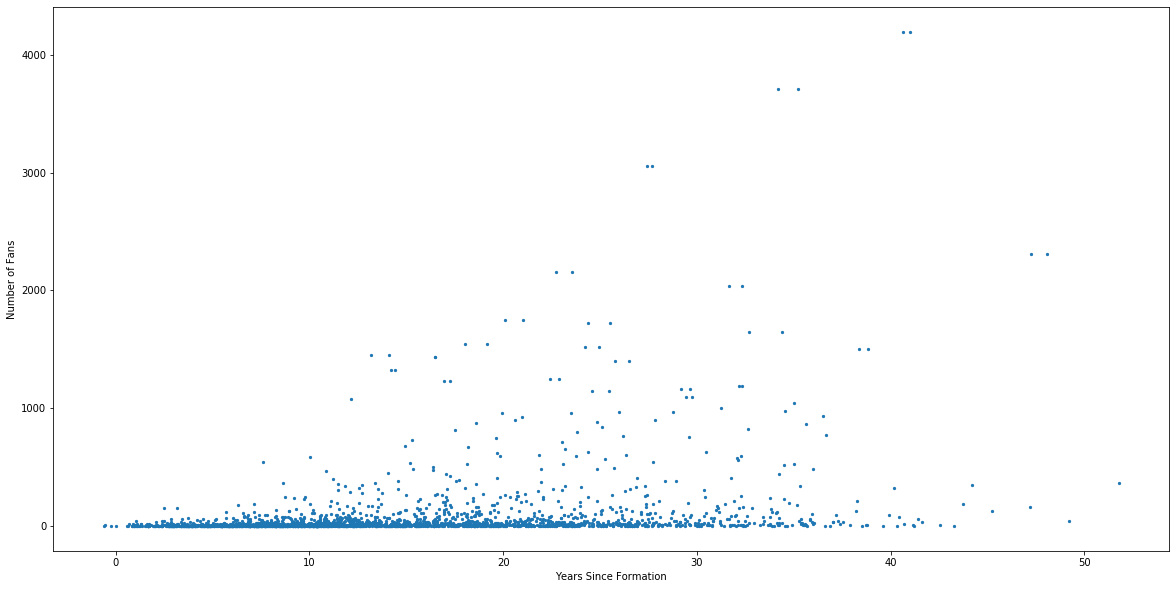

In [233]:
# Select bands that haven't split up
active_bands = bands[bands['split'] == '-']

# Jitter active bands' years since formation
jittered_history_active = rand_jitter(active_bands['history'])

# Set the figure size
plt.figure(figsize=(20,10))

# Generate the scatter plot using jittered points
plt.scatter(x=jittered_history_active, y=active_bands['fans'], s=5)

# Add title and labels
plt.ylabel('Number of Fans')
plt.xlabel('Years Since Formation')

# Display the plot
plt.show()

There seems to be a positive, albeit weak, correlation between popularity and history. Of course, we need statistical tests to see whether this correlation is significant or just noise.

### Distribution of metal fan bases
Like many things in life, it seems a few popular bands enjoy the majority of the metal fan base across the world base whereas everybody else shares the rest. Is this actually the case? To answer this question, we can draw a density plot to visualize the distribution of the number of fans.

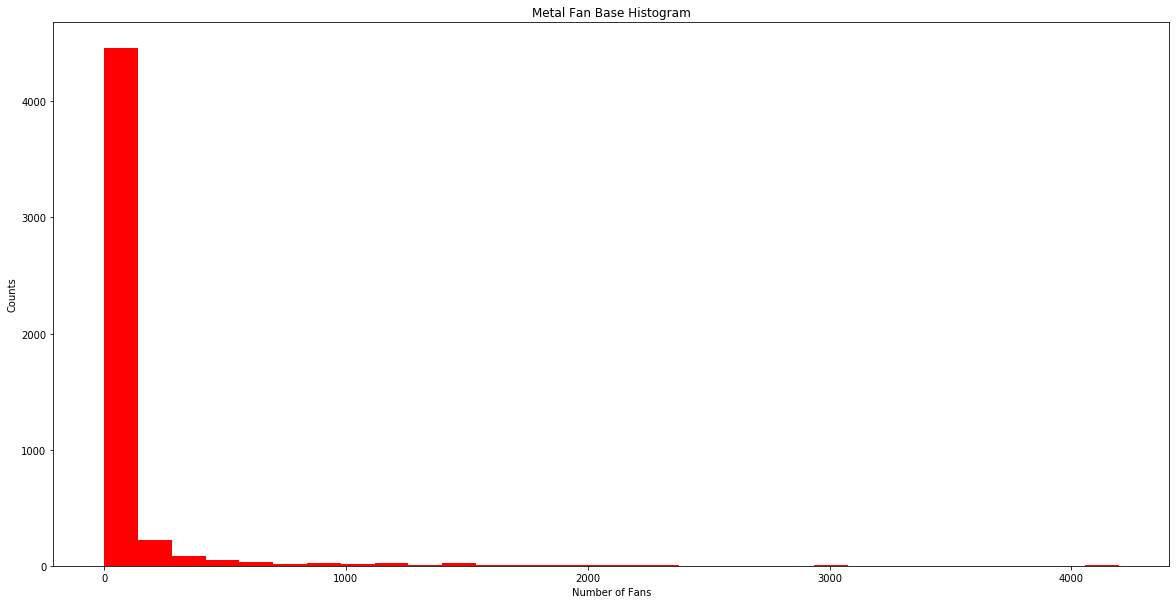

In [263]:
# Set the figure size
plt.figure(figsize=(20,10))

# Create the histogram
plt.hist(bands['fans'], bins=30, color='red')

# Add lable the title
plt.xlabel('Number of Fans')
plt.ylabel('Frequency')
plt.title('Metal Fan Base Histogram')

# Show plot
plt.show()

Again, the above shows the result for all metal bands. Let's break look at active and non-active bands separately.

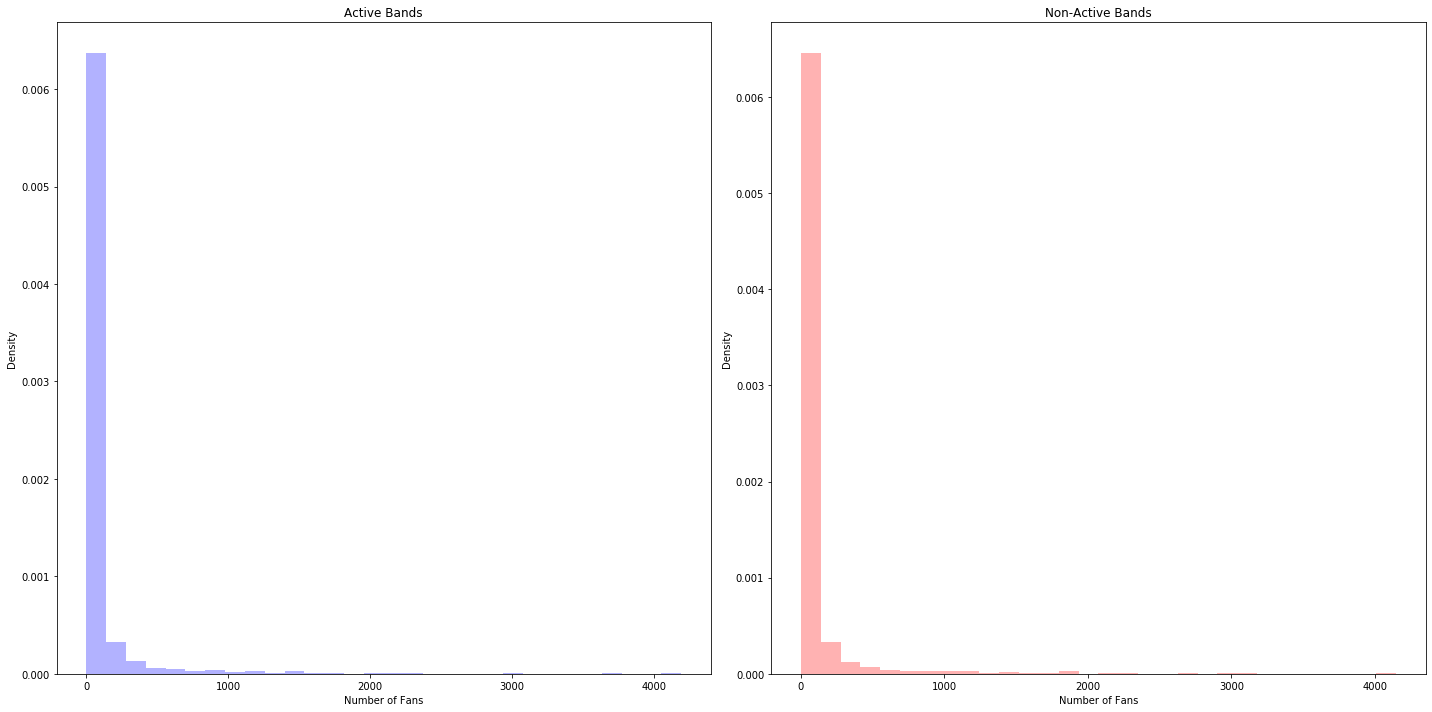

In [270]:
# Create a new data frame for non-active bands
dead_bands = bands[bands['split'] != '-']

# Set the figure size
plt.figure(figsize=(20,10))

# Histogram for active bands
# To allow comparison, let's use density instead of frequency 
plt.subplot(1, 2, 1)
plt.hist(active_bands['fans'], density=True, color='blue', bins=30, alpha=.3) 
plt.ylabel('Density')
plt.xlabel('Number of Fans')
plt.title('Active Bands')

# Histogram for non-active bands
plt.subplot(1, 2, 2)
plt.hist(dead_bands['fans'], density=True, color='red', bins=30, alpha=.3)
plt.ylabel('Density')
plt.xlabel('Number of Fans')
plt.title('Non-Active Bands')

plt.tight_layout()
plt.show()

The power law-like distribution seems to apply to both active and non-active bands.